In [ ]:

import os
import random
import torch
import torchvision

import numpy as np

import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

from skimage import io
from skimage import transform

from torch import nn
from torch import from_numpy
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

from torchvision.models import vgg16, resnet18, alexnet
from torchvision import transforms
from torch import optim

from matplotlib import pyplot as plt

# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PneumoniaMNIST (Binary Class data)

In [ ]:
#Loading PneumoniaMNIST
pneu_file_path = "/content/drive/MyDrive/PRNN/pneumoniamnist.npz"

pneu_data = np.load(pneu_file_path)
# print(pneu_data)
# Extrating training data
pneu_train_data = pneu_data["train_images"]
pneu_train_labels = pneu_data["train_labels"]

# Extracting test data
pneu_test_data = pneu_data["test_images"]

pneu_test_labels = pneu_data["test_labels"]

# Extracting validation data
pneu_val_data = pneu_data["val_images"]
pneu_val_labels = pneu_data["val_labels"]

# Vectorizing data
vector_size = pneu_train_data.shape[1] * pneu_train_data.shape[2]

pneu_train_vdata = np.resize(pneu_train_data, (pneu_train_data.shape[0],vector_size))

pneu_test_vdata = np.resize(pneu_test_data, (pneu_test_data.shape[0],vector_size))

pneu_val_vdata = np.resize(pneu_val_data, (pneu_val_data.shape[0],vector_size))

print(pneu_train_vdata.shape)
print(pneu_test_vdata.shape)
print(pneu_val_vdata.shape)

(4708, 784)
(624, 784)
(524, 784)


#BloodMNIST (MULTI Class Data)

In [ ]:
# Loading BloodMNIST
blood_file_path = "/content/drive/MyDrive/PRNN/bloodmnist.npz"

blood_data = np.load(blood_file_path)

# Extrating training data
blood_train_data = blood_data["train_images"]
blood_train_labels = blood_data["train_labels"]

# Extracting test data
blood_test_data = blood_data["test_images"]
blood_test_labels = blood_data["test_labels"]

# Extracting validation data
blood_val_data = blood_data["val_images"]
blood_val_labels = blood_data["val_labels"]

# Vectorizing data
vector_size = blood_train_data.shape[1] * blood_train_data.shape[2]

blood_train_vdata = np.resize(blood_train_data, (blood_train_data.shape[0],vector_size))

blood_test_vdata = np.resize(blood_test_data, (blood_test_data.shape[0],vector_size))

blood_val_vdata = np.resize(blood_val_data, (blood_val_data.shape[0],vector_size))

print(blood_train_vdata.shape)
print(blood_test_vdata.shape)
print(blood_val_vdata.shape)

(11959, 784)
(3421, 784)
(1712, 784)


#Traffic signs Data for bounding box regression problem

In [ ]:
# Loading Traffic signs data for bounding box regression problem
traffic_images_path = "/content/drive/MyDrive/PRNN/Traffic sign/images"
traffic_annotations_path = "/content/drive/MyDrive/PRNN/Traffic sign/annotations"

traffic_labels = list()

for annot_path in os.listdir(traffic_annotations_path):
  traffic_labels.append(annot_path)

# Ratio for test data
train_prob = 0.7

traffic_train_data = list()
traffic_test_data = list()
traffic_train_gray_data = list()
traffic_test_gray_data = list()

traffic_train_labels = list()
traffic_test_labels = list()

for i in range(len(traffic_labels)):
  tree = ET.parse(os.path.join(traffic_annotations_path, traffic_labels[i]))
  root = tree.getroot()
  
  img_file = root[1].text

  obj = root.find("object")
  bndbox = obj.find("bndbox")

  if bndbox:
    box = np.array([[int(bndbox[0].text), int(bndbox[1].text), int(bndbox[2].text), int(bndbox[3].text)]])

    img = io.imread(os.path.join(traffic_images_path, img_file))[:,:,:3]
    img_gray = io.imread(os.path.join(traffic_images_path, img_file), as_gray = True)

    if img.shape[0] == 400 and img.shape[1] == 300:
      img = transform.resize(img, (200,150), anti_aliasing = True)
      img_gray = transform.resize(img_gray, (200,150), anti_aliasing = True)

      label = box//2

      if random.random() <= train_prob:
        traffic_train_data.append(img)
        traffic_train_gray_data.append(img_gray)
        traffic_train_labels.append(label)
      else:
        traffic_test_data.append(img)
        traffic_test_gray_data.append(img_gray)
        traffic_test_labels.append(label)

KeyboardInterrupt: ignored

In [ ]:
traffic_train_labels = np.array(traffic_train_labels)
traffic_test_labels = np.array(traffic_test_labels)
print(traffic_train_labels.shape)
print(traffic_test_labels.shape)

traffic_train_data = np.array(traffic_train_data)
traffic_test_data = np.array(traffic_test_data)
traffic_train_gray_data = np.array(traffic_train_gray_data)
traffic_test_gray_data = np.array(traffic_test_gray_data)

print(traffic_train_data.shape)
print(traffic_test_data.shape)
print(traffic_test_gray_data.shape)
print(traffic_train_gray_data.shape)

traffic_train_vdata = np.resize(traffic_train_data, (traffic_train_data.shape[0],400*300*3))
traffic_test_vdata = np.resize(traffic_test_data, (traffic_test_data.shape[0],400*300*3))
traffic_train_gray_vdata = np.resize(traffic_train_gray_data, (traffic_train_gray_data.shape[0],400*300))
traffic_test_gray_vdata = np.resize(traffic_test_gray_data, (traffic_test_gray_data.shape[0],400*300))

print()
print(traffic_train_vdata.shape)
print(traffic_test_vdata.shape)
print(traffic_test_gray_vdata.shape)
print(traffic_train_gray_vdata.shape)

#Data Preprocessing for Pytorch

In [ ]:
class PneumoniaDataset(Dataset):
  def __init__(self, data, labels, num_classes, channels):
    self.data = data
    self.labels = labels
    self.classes = num_classes
    self.channels = channels

  def __getitem__(self, index):
    data = transform.resize(self.data[index], (64,64), anti_aliasing=True)
    
    a = None

    if self.channels != 3:
      a = np.array([data,data,data])
    else:
      a = np.array([data[:,:,0],data[:,:,1],data[:,:,2]])

    label = np.zeros((self.classes))
    label[self.labels[index]] = 1

    return from_numpy(a).type(torch.FloatTensor), label

  def __len__(self):
    return self.data.shape[0]
    

In [ ]:
pneu_pytorch_train = PneumoniaDataset(pneu_train_data, pneu_train_labels, 2, 1)
pneu_pytorch_test = PneumoniaDataset(pneu_test_data, pneu_test_labels, 2, 1)
pneu_pytorch_val = PneumoniaDataset(pneu_val_data, pneu_val_labels, 2, 1)
#for i in range(4000):
#  print(pneu_pytorch_train[i][0].shape,pneu_train_labels[i])
pneu_train_loader = DataLoader(pneu_pytorch_train, batch_size=214, shuffle=True, num_workers=2)
pneu_test_loader = DataLoader(pneu_pytorch_test, batch_size=len(pneu_pytorch_test), shuffle=True, num_workers=2)
pneu_val_loader = DataLoader(pneu_pytorch_val, batch_size=len(pneu_pytorch_val), shuffle=True, num_workers=2)

In [ ]:
blood_pytorch_train = PneumoniaDataset(blood_train_data, blood_train_labels, 8, 3)
blood_pytorch_test = PneumoniaDataset(blood_test_data, blood_test_labels, 8, 3)
blood_pytorch_val = PneumoniaDataset(blood_val_data, blood_val_labels, 8, 3)
#for i in range(4000):
#  print(blood_pytorch_train[i][0].shape,blood_train_labels[i])
blood_train_loader = DataLoader(blood_pytorch_train, batch_size=214, shuffle=True, num_workers=4)
blood_test_loader = DataLoader(blood_pytorch_test, batch_size=len(blood_pytorch_test), shuffle=True, num_workers=4)
blood_val_loader = DataLoader(blood_pytorch_val, batch_size=len(blood_pytorch_val), shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
def calc_classification_metrics(y1,y2):
  # print(y1.shape,y2.shape)
  accuracy = (y1[np.where(y1==y2)].size)/y1.size
  print("Accuracy:",accuracy)

  try:
    f1 = f1_score(y1,y2,average='micro')
    print("F1 Score:",f1)
  except:
    pass

  try:
    auc = roc_auc_score(y1,y2,multi_class='ovo')
    print("AUC:",auc)
  except:
    pass

In [ ]:
def metrics(y_test, y_pred):
    # print(y_test.shape)
    # print(y_pred.shape)
    # np.argmax(y_pred, axis=1)
    print(f"model accuracy = {accuracy_score(y_test, np.round(abs(np.argmax(y_pred, axis=1))), normalize=False)}")
    # print("base_model")

    print(f"precision score = {precision_score(y_test, np.round(abs(np.argmax(y_pred, axis=1))))}")
    print(f"recall score = {recall_score(y_test, np.round(abs(np.argmax(y_pred, axis=1))))}")
    print(f"F1 score = {f1_score(y_test, np.round(abs(np.argmax(y_pred, axis=1))))}")
    fpr, tpr, thresholds = roc_curve(y_test, np.round(abs(np.argmax(y_pred, axis=1))))
    print(fpr)
    print(tpr)
    print(f"auc score = {auc(fpr, tpr)}")
    # metrics.auc(fpr, tpr)

In [ ]:
from numpy import linalg
data=pneu_train_vdata
N=len(pneu_train_vdata)
def gaussian(data,W, N):
  means = {}
  covariance = {}
  priors = {} # p(Ck)
  for id_, (class_id, values) in enumerate(data.items()):
    proj = np.dot(values,W)
#     print("projection:",proj.shape)
    means[id_] = np.mean(proj,axis=0)
#     print("means:",means[id_].shape)
    covariance[id_] = np.cov(proj,rowvar=False)
#     print("covariance:",covariance[id_].shape)
    priors[id_] = values.shape[0] / N
  return means, covariance, priors

def gaussian_distribution(x,u,cov,D):
#   print("mean:",u.shape)
#   print("cov:",cov.shape)
#   print("x:",x.shape)
  
  scalar = (1/((2*np.pi)**(D/2))) * (1/np.sqrt(np.linalg.det(cov)))
  x_sub_u = np.subtract(x, u)
  inv_cov = linalg.inv(cov)
#   print("inv_cov:",inv_cov.shape)
#   print("x_sub_u:",x_sub_u.shape)
#   print("first dot:",np.dot(x_sub_u, inv_cov).shape)
#   print("second dot:",np.dot(np.dot(x_sub_u, inv_cov),x_sub_u.T).shape)
  return scalar * -np.dot(np.dot(x_sub_u, inv_cov),x_sub_u.T)/2

In [ ]:

print(N)
gaussian_likelihoods = []
for x in X_projected:
  row = []
  for c in range(3): # number of classes
    res = priors[c] * gaussian_distribution(x, means[c], covariance[c], D=len(x)) # Compute the posterios P(Ck|x) prob of a class k given a point x
    row.append(res)
    
  gaussian_likelihoods.append(row)
  
gaussian_likelihoods = np.asarray(gaussian_likelihoods)
print("gaussian_likelihoods:",gaussian_likelihoods.shape)

4708


NameError: ignored

In [ ]:
predictions = np.argmax(gaussian_likelihoods,axis=1)
print(predictions[0:10], np.unique(predictions))
print("Accuracy:",np.sum(predictions == labels)/N)

#CNN From Scratch

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [ ]:
#activation functions
class ActivationFunction:
    def f(self, x):
        raise NotImplementedError

    def df(self, x, cached_y=None):
        raise NotImplementedError


class Identity(ActivationFunction):
    def f(self, x):
        return x

    def df(self, x, cached_y=None):
        return np.full(x.shape, 1)


class Sigmoid(ActivationFunction):
    def f(self, x):
        return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

    def df(self, x, cached_y=None):
        y = cached_y if cached_y is not None else self.f(x)
        return y * (1 - y)


class ReLU(ActivationFunction):
    def f(self, x):
        return np.maximum(0, x)

    def df(self, x, cached_y=None):
        return np.where(x <= 0, 0, 1)


class SoftMax(ActivationFunction):
    def f(self, x):
        y = np.exp(x - np.max(x, axis=1, keepdims=True))
        return y / np.sum(y, axis=1, keepdims=True)

    def df(self, x, cached_y=None):
        raise NotImplementedError


identity = Identity()
sigmoid = Sigmoid()
relu = ReLU()
softmax = SoftMax()

In [ ]:
#cost functions
epsilon = 1e-20

class CostFunction:
    def f(self, a_last, y):
        raise NotImplementedError

    def grad(self, a_last, y):
        raise NotImplementedError


class SigmoidCrossEntropy(CostFunction):
    def f(self, a_last, y):
        batch_size = y.shape[0]
        a_last = np.clip(a_last, epsilon, 1.0 - epsilon)
        cost = -1 / batch_size * (y * np.log(a_last) + (1 - y) * np.log(1 - a_last)).sum()
        return cost

    def grad(self, a_last, y):
        a_last = np.clip(a_last, epsilon, 1.0 - epsilon)
        return - (np.divide(y, a_last) - np.divide(1 - y, 1 - a_last))


class SoftmaxCrossEntropy(CostFunction):
    def f(self, a_last, y):
        batch_size = y.shape[0]
        cost = -1 / batch_size * (y * np.log(np.clip(a_last, epsilon, 1.0))).sum()
        return cost

    def grad(self, a_last, y):
        return - np.divide(y, np.clip(a_last, epsilon, 1.0))

class Squared_error(CostFunction):
    def f(self, a_last, y):
        batch_size = y.shape[0]
        cost = 1 /batch_size * ((y-a_last)**2).sum()
        return cost

    def grad(self, a_last, y):
        return (y-a_last).sum()

squared_error = Squared_error()
softmax_cross_entropy = SoftmaxCrossEntropy()
sigmoid_cross_entropy = SigmoidCrossEntropy()

In [ ]:
#layers

#layer class
class Layer:

    def init(self, in_dim):
        raise NotImplementedError

    def forward(self, a_prev, training):
        raise NotImplementedError

    def backward(self, da):
        #Propagates back the gradients
        raise NotImplementedError

    def update_params(self, dw, db):
        raise NotImplementedError
    def update_params_L2(self, dw, db):
        raise NotImplementedError

    def get_params(self):
        raise NotImplementedError

    def get_output_dim(self):
        raise NotImplementedError


#convolutional layer

class Conv(Layer):

    def __init__(self, kernel_size, stride, n_c, padding='valid', activation=identity):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.pad = None
        self.n_h, self.n_w, self.n_c = None, None, n_c
        self.n_h_prev, self.n_w_prev, self.n_c_prev = None, None, None
        self.w = None
        self.b = None
        self.activation = activation
        self.cache = {}

    def init(self, in_dim):
        self.pad = 0 if self.padding == 'valid' else int((self.kernel_size - 1) / 2)

        self.n_h_prev, self.n_w_prev, self.n_c_prev = in_dim
        self.n_h = int((self.n_h_prev - self.kernel_size + 2 * self.pad) / self.stride + 1)
        self.n_w = int((self.n_w_prev - self.kernel_size + 2 * self.pad) / self.stride + 1)

        self.w = np.random.randn(self.kernel_size, self.kernel_size, self.n_c_prev, self.n_c)
        self.b = np.zeros((1, 1, 1, self.n_c))

    def forward(self, a_prev, training):
        batch_size = a_prev.shape[0]
        a_prev_padded = Conv.zero_pad(a_prev, self.pad)
        out = np.zeros((batch_size, self.n_h, self.n_w, self.n_c))

        # Convolve
        for i in range(self.n_h):
            v_start = i * self.stride
            v_end = v_start + self.kernel_size

            for j in range(self.n_w):
                h_start = j * self.stride
                h_end = h_start + self.kernel_size

                out[:, i, j, :] = np.sum(a_prev_padded[:, v_start:v_end, h_start:h_end, :, np.newaxis] *
                                         self.w[np.newaxis, :, :, :], axis=(1, 2, 3))

        z = out + self.b
        a = self.activation.f(z)

        if training:
            # Cache for backward pass
            self.cache.update({'a_prev': a_prev, 'z': z, 'a': a})

        return a

    def backward(self, da):
        batch_size = da.shape[0]
        a_prev, z, a = (self.cache[key] for key in ('a_prev', 'z', 'a'))
        a_prev_pad = Conv.zero_pad(a_prev, self.pad) if self.pad != 0 else a_prev

        da_prev = np.zeros((batch_size, self.n_h_prev, self.n_w_prev, self.n_c_prev))
        da_prev_pad = Conv.zero_pad(da_prev, self.pad) if self.pad != 0 else da_prev

        dz = da * self.activation.df(z, cached_y=a)
        db = 1 / batch_size * dz.sum(axis=(0, 1, 2))
        dw = np.zeros((self.kernel_size, self.kernel_size, self.n_c_prev, self.n_c))

        # 'Convolve' back
        for i in range(self.n_h):
            v_start = self.stride * i
            v_end = v_start + self.kernel_size

            for j in range(self.n_w):
                h_start = self.stride * j
                h_end = h_start + self.kernel_size

                da_prev_pad[:, v_start:v_end, h_start:h_end, :] += \
                    np.sum(self.w[np.newaxis, :, :, :, :] * dz[:, i:i+1, j:j+1, np.newaxis, :], axis=4)

                dw += np.sum(a_prev_pad[:, v_start:v_end, h_start:h_end, :, np.newaxis] *
                             dz[:, i:i+1, j:j+1, np.newaxis, :], axis=0)

        dw /= batch_size

        if self.pad != 0:
            da_prev = da_prev_pad[:, self.pad:-self.pad, self.pad:-self.pad, :]

        return da_prev, dw, db

    def get_output_dim(self):
        return self.n_h, self.n_w, self.n_c

    def update_params(self, dw, db):
        self.w -= dw
        self.b -= db
    def update_params_L2(self, dw, db):
        self.w = (-self.w) - dw
        self.b -= db

    def get_params(self):
        return self.w, self.b

    @staticmethod
    def zero_pad(x, pad):
        return np.pad(x, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode='constant')


#dropout
class Dropout(Layer):
    def __init__(self, keep_prob):
        super().__init__()
        assert 0 < keep_prob < 1, "Keep probability between 0 and 1"
        self.keep_prob = keep_prob
        self.mask_dim = None
        self.cached_mask = None

    def init(self, in_dim):
        self.mask_dim = in_dim

    def forward(self, a_prev, training):
        if training:
            mask = (np.random.rand(*a_prev.shape) < self.keep_prob)
            a = self.inverted_dropout(a_prev, mask)

            # Cache for backward pass
            self.cached_mask = mask

            return a

        return a_prev

    def backward(self, da):
        return self.inverted_dropout(da, self.cached_mask), None, None

    def update_params(self, dw, db):
        pass

    def update_params_L2(self, dw, db):
        pass

    def get_params(self):
        pass

    def get_output_dim(self):
        return self.mask_dim

    def inverted_dropout(self, a, mask):
        a *= mask
        a /= self.keep_prob
        return a


#fully connected
class FullyConnected(Layer):

    def __init__(self, size, activation):
        super().__init__()
        self.size = size
        self.activation = activation
        self.is_softmax = isinstance(self.activation, SoftMax)
        self.cache = {}
        self.w = None
        self.b = None

    def init(self, in_dim):
        # weights initialization
        self.w = np.random.randn(self.size, in_dim) * np.sqrt(2 / in_dim)

        self.b = np.zeros((1, self.size))

    def forward(self, a_prev, training):
        z = np.dot(a_prev, self.w.T) + self.b
        a = self.activation.f(z)

        if training:
            # Cache for backward pass
            self.cache.update({'a_prev': a_prev, 'z': z, 'a': a})

        return a

    def backward(self, da):
        a_prev, z, a = (self.cache[key] for key in ('a_prev', 'z', 'a'))
        batch_size = a_prev.shape[0]

        if self.is_softmax:
            y = da * (-a)

            dz = a - y
        else:
            dz = da * self.activation.df(z, cached_y=a)

        dw = 1 / batch_size * np.dot(dz.T, a_prev)
        db = 1 / batch_size * dz.sum(axis=0, keepdims=True)
        da_prev = np.dot(dz, self.w)

        return da_prev, dw, db

    def update_params(self, dw, db):
        self.w -= dw
        self.b -= db

    def update_params_L2(self, dw, db):
        self.w = (-self.w) - dw
        self.b -= db

    def get_params(self):
        return self.w, self.b

    def get_output_dim(self):
        return self.size


#flatten
class Flatten(Layer):

    def __init__(self):
        super().__init__()
        self.original_dim = None
        self.output_dim = None

    def init(self, in_dim):
        self.original_dim = in_dim
        self.output_dim = reduce(lambda x, y: x * y, self.original_dim)

    def forward(self, a_prev, training):
        return a_prev.reshape(a_prev.shape[0], -1)

    def backward(self, da):
        return da.reshape(da.shape[0], *self.original_dim), None, None

    def get_params(self):
        pass

    def update_params_L2(self, dw, db):
        pass

    def update_params(self, dw, db):
        pass

    def get_output_dim(self):
        return self.output_dim

#pool

class Pool(Layer):
    
    def __init__(self, pool_size, stride, mode):
        super().__init__()
        self.pool_size = pool_size
        self.stride = stride
        self.n_h, self.n_w, self.n_c = None, None, None
        self.n_h_prev, self.n_w_prev, self.n_c_prev = None, None, None
        self.w = None
        self.b = None
        self.mode = mode
        self.cache = {}

    def init(self, in_dim):
        self.n_h_prev, self.n_w_prev, self.n_c_prev = in_dim
        self.n_h = int((self.n_h_prev - self.pool_size) / self.stride + 1)
        self.n_w = int((self.n_w_prev - self.pool_size) / self.stride + 1)
        self.n_c = self.n_c_prev

    def forward(self, a_prev, training):
        batch_size = a_prev.shape[0]
        a = np.zeros((batch_size, self.n_h, self.n_w, self.n_c))

        # Pool
        for i in range(self.n_h):
            v_start = i * self.stride
            v_end = v_start + self.pool_size

            for j in range(self.n_w):
                h_start = j * self.stride
                h_end = h_start + self.pool_size

                if self.mode == 'max':
                    a_prev_slice = a_prev[:, v_start:v_end, h_start:h_end, :]

                    if training:
                        # Cache for backward pass
                        self.cache_max_mask(a_prev_slice, (i, j))

                    a[:, i, j, :] = np.max(a_prev_slice, axis=(1, 2))

                elif self.mode == 'average':
                    a[:, i, j, :] = np.mean(a_prev[:, v_start:v_end, h_start:h_end, :], axis=(1, 2))

                else:
                    raise NotImplementedError("Invalid type of pooling")

        if training:
            self.cache['a_prev'] = a_prev

        return a

    def backward(self, da):
        a_prev = self.cache['a_prev']
        batch_size = a_prev.shape[0]
        da_prev = np.zeros((batch_size, self.n_h_prev, self.n_w_prev, self.n_c_prev))

        # 'Pool' back
        for i in range(self.n_h):
            v_start = i * self.stride
            v_end = v_start + self.pool_size

            for j in range(self.n_w):
                h_start = j * self.stride
                h_end = h_start + self.pool_size

                if self.mode == 'max':
                    da_prev[:, v_start:v_end, h_start:h_end, :] += da[:, i:i+1, j:j+1, :] * self.cache[(i, j)]

                elif self.mode == 'average':
                    # Distribute the average value back
                    mean_value = np.copy(da[:, i:i+1, j:j+1, :])
                    mean_value[:, :, :, np.arange(mean_value.shape[-1])] /= (self.pool_size * self.pool_size)
                    da_prev[:, v_start:v_end, h_start:h_end, :] += mean_value

                else:
                    raise NotImplementedError("Invalid type of pooling")

        return da_prev, None, None

    def cache_max_mask(self, x, ij):
        mask = np.zeros_like(x)
        reshaped_x = x.reshape(x.shape[0], x.shape[1] * x.shape[2], x.shape[3])
        idx = np.argmax(reshaped_x, axis=1)
        ax1, ax2 = np.indices((x.shape[0], x.shape[3]))
        mask.reshape(mask.shape[0], mask.shape[1] * mask.shape[2], mask.shape[3])[ax1, idx, ax2] = 1
        self.cache[ij] = mask

    def update_params(self, dw, db):
        pass

    def update_params_L2(self, dw, db):
        pass

    def get_params(self):
        pass

    def get_output_dim(self):
        return self.n_h, self.n_w, self.n_c





In [ ]:
#optimizer
#implemented simple gradient descent approach for optimization
class Optimizer:

    def __init__(self, trainable_layers):
        self.trainable_layers = trainable_layers

    def initialize(self):
        raise NotImplementedError

    def update(self, learning_rate, w_grads, b_grads, step):
        raise NotImplementedError


class GradientDescent(Optimizer):
    def __init__(self, trainable_layers):
        Optimizer.__init__(self, trainable_layers)

    def initialize(self):
        pass

    def update(self, learning_rate, w_grads, b_grads, step):
        for layer in self.trainable_layers:
            layer.update_params(dw=learning_rate * w_grads[layer],
                                db=learning_rate * b_grads[layer])
            
    def update_L2(self, learning_rate, w_grads, b_grads, step):
        for layer in self.trainable_layers:
            layer.update_params_L2(dw=learning_rate * w_grads[layer],
                                db=learning_rate * b_grads[layer])

gradient_descent = GradientDescent


In [ ]:
# Neural net
# in the train step if we give minibatch size then mini batch based normalization is executed
# for dropout normalization I have created a separate class in layers
# for L1 and L2 just updated it in the weight udate step
from functools import reduce

class NeuralNetwork:
    def __init__(self, input_dim, layers, cost_function, optimizer=gradient_descent, l2_lambda=0):
        self.layers = layers
        self.w_grads = {}
        self.b_grads = {}
        self.cost_function = cost_function
        self.optimizer = optimizer
        self.l2_lambda = l2_lambda

        self.layers[0].init(input_dim)
        for prev_layer, curr_layer in zip(self.layers, self.layers[1:]):
            curr_layer.init(prev_layer.get_output_dim())

        self.trainable_layers = set(layer for layer in self.layers if layer.get_params() is not None)
        self.optimizer = optimizer(self.trainable_layers)
        self.optimizer.initialize()

    def forward_prop(self, x, training=True):
        a = x
        for layer in self.layers:
            a = layer.forward(a, training)

        return a

    def backward_prop(self, a_last, y):
        da = self.cost_function.grad(a_last, y)
        batch_size = da.shape[0]

        for layer in reversed(self.layers):
            da_prev, dw, db = layer.backward(da)

            if layer in self.trainable_layers:
                if self.l2_lambda != 0:
                    self.w_grads[layer] = dw + (self.l2_lambda / batch_size) * layer.get_params()[0]
                else:
                    self.w_grads[layer] = dw

                self.b_grads[layer] = db

            da = da_prev

    def predict(self, x):
        a_last = self.forward_prop(x, training=False)
        return a_last

    def update_param(self, learning_rate, step):
        self.optimizer.update(learning_rate, self.w_grads, self.b_grads, step)

    def compute_cost(self, a_last, y):
        cost = self.cost_function.f(a_last, y)
        if self.l2_lambda != 0:
            batch_size = y.shape[0]
            weights = [layer.get_params()[0] for layer in self.trainable_layers]
            l2_cost = (self.l2_lambda / (2 * batch_size)) * reduce(lambda ws, w: ws + np.sum(np.square(w)), weights, 0)
            return cost + l2_cost
        else:
            return cost

    def train(self, x_train, y_train, mini_batch_size, learning_rate, num_epochs, validation_data):
        x_val, y_val = validation_data
        print(f"Started training [batch_size={mini_batch_size}, learning_rate={learning_rate}]")
        step = 0
        for e in range(num_epochs):
            print("Epoch " + str(e + 1))
            epoch_cost = 0

            if mini_batch_size == x_train.shape[0]:
                mini_batches = (x_train, y_train)
            else:
                mini_batches = NeuralNetwork.create_mini_batches(x_train, y_train, mini_batch_size)

            num_mini_batches = len(mini_batches)
            for i, mini_batch in enumerate(mini_batches, 1):
                mini_batch_x, mini_batch_y = mini_batch
                step += 1
                epoch_cost += self.train_step(mini_batch_x, mini_batch_y, learning_rate, step) / mini_batch_size


            print(f"\nCost after epoch {e+1}: {epoch_cost}")

            print("Computing accuracy on validation set...")
            accuracy = np.sum(np.argmax(self.predict(x_val), axis=1) == np.transpose(y_val)) / x_val.shape[0]
            print(f"Accuracy on validation set: {accuracy}")

            y_pre = self.predict(x_val)
            y_pred = abs(np.argmax(y_pre, axis=1))
            calc_classification_metrics(y_val[:,0], y_pred)
            # metrics(y_val, y_pred) 

        print("Finished training")

    def train_step(self, x_train, y_train, learning_rate, step):
        a_last = self.forward_prop(x_train, training=True)
        self.backward_prop(a_last, y_train)
        cost = self.compute_cost(a_last, y_train)
        self.update_param(learning_rate, step)
        return cost

    @staticmethod
    def create_mini_batches(x, y, mini_batch_size):
        batch_size = x.shape[0]
        mini_batches = []

        p = np.random.permutation(x.shape[0])
        x, y = x[p, :], y[p, :]
        num_complete_minibatches = batch_size // mini_batch_size

        for k in range(0, num_complete_minibatches):
            mini_batches.append((
                x[k * mini_batch_size:(k + 1) * mini_batch_size, :],
                y[k * mini_batch_size:(k + 1) * mini_batch_size, :]
            ))

        if batch_size % mini_batch_size != 0:
            mini_batches.append((
                x[num_complete_minibatches * mini_batch_size:, :],
                y[num_complete_minibatches * mini_batch_size:, :]
            ))

        return mini_batches


In [ ]:
def one_hot(x, num_classes):
    out = np.zeros((x.shape[0], num_classes))
    out[np.arange(x.shape[0]), x[:, 0]] = 1
    return out


def preprocess(x_train, y_train, x_test, y_test, channels, classes):
    x_train = x_train.reshape(x_train.shape[0], 28, 28, channels).astype(np.float32)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, channels).astype(np.float32)
    y_train = one_hot(y_train.reshape(y_train.shape[0], 1), classes)
    x_train /= 255
    x_test /= 255
    return x_train, y_train, x_test, y_test

In [ ]:
#CNN for PneumoniaMNIST
x_train, y_train, x_test, y_test = preprocess(pneu_train_data, pneu_train_labels, pneu_test_data, pneu_test_labels, 1, 2)

print("For Pneumonia dataset")

cnn = NeuralNetwork(
    input_dim=(28, 28, 1),
    layers=[Conv(5, 1, 32, activation=relu),
        Pool(2, 2, 'max'),
        Dropout(0.75),
        Flatten(),
        FullyConnected(128, relu),
        Dropout(0.9),
        FullyConnected(2, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

cnn.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

For Pneumonia dataset
Started training [batch_size=256, learning_rate=0.001]
Epoch 1

Cost after epoch 1: 0.13122359211678303
Computing accuracy on validation set...
Accuracy on validation set: 0.7115384615384616
Accuracy: 0.7115384615384616
F1 Score: 0.7115384615384616
AUC: 0.6444444444444444
Epoch 2

Cost after epoch 2: 0.05587871408672506
Computing accuracy on validation set...
Accuracy on validation set: 0.6266025641025641
Accuracy: 0.6266025641025641
F1 Score: 0.6266025641025641
AUC: 0.5021367521367521
Epoch 3

Cost after epoch 3: 0.04214034341026793
Computing accuracy on validation set...
Accuracy on validation set: 0.6522435897435898
Accuracy: 0.6522435897435898
F1 Score: 0.6522435897435898
AUC: 0.5363247863247863
Epoch 4

Cost after epoch 4: 0.03821754794393071
Computing accuracy on validation set...
Accuracy on validation set: 0.7708333333333334
Accuracy: 0.7708333333333334
F1 Score: 0.7708333333333333
AUC: 0.6995726495726495
Finished training


In [ ]:
#CNN for BloodMNIST
x_train, y_train, x_test, y_test = preprocess(blood_train_data, blood_train_labels, blood_test_data, blood_test_labels,3 , 8)

print("For BloodMNIST dataset")

cnn = NeuralNetwork(
    input_dim=(28, 28, 3),
    layers=[Conv(5, 1, 32, activation=relu),
        Pool(2, 2, 'max'),
        Dropout(0.75),
        Flatten(),
        FullyConnected(128, relu),
        Dropout(0.9),
        FullyConnected(8, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

cnn.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

For BloodMNIST dataset
Started training [batch_size=256, learning_rate=0.001]
Epoch 1

Cost after epoch 1: 0.5559061871598436
Computing accuracy on validation set...
Accuracy on validation set: 0.32885121309558607
(3421,) (3421,)
Accuracy: 0.32885121309558607
F1 Score: 0.32885121309558607
Epoch 2

Cost after epoch 2: 0.36264059723979986
Computing accuracy on validation set...
Accuracy on validation set: 0.3346974568839521
(3421,) (3421,)
Accuracy: 0.3346974568839521
F1 Score: 0.3346974568839521
Epoch 3

Cost after epoch 3: 0.3455478401893684
Computing accuracy on validation set...
Accuracy on validation set: 0.3893598363051739
(3421,) (3421,)
Accuracy: 0.3893598363051739
F1 Score: 0.3893598363051739
Epoch 4

Cost after epoch 4: 0.33443009621322256
Computing accuracy on validation set...
Accuracy on validation set: 0.4174218064893306
(3421,) (3421,)
Accuracy: 0.4174218064893306
F1 Score: 0.4174218064893306
Finished training


In [ ]:
#MLP for BloodMNIST
#without regularization
x_train, y_train, x_test, y_test = preprocess(blood_train_data, blood_train_labels, blood_test_data, blood_test_labels,3 , 8)

print("For BloodMNIST dataset")

mlp = NeuralNetwork(
    input_dim=(28, 28, 3),
    layers=[Flatten(),
        FullyConnected(128, relu),
        FullyConnected(8, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

mlp.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

For BloodMNIST dataset
Started training [batch_size=256, learning_rate=0.001]
Epoch 1

Cost after epoch 1: 0.3717687298422999
Computing accuracy on validation set...
Accuracy on validation set: 0.3256357790119848
Accuracy: 0.3256357790119848
F1 Score: 0.3256357790119848
Epoch 2

Cost after epoch 2: 0.34942161487173334
Computing accuracy on validation set...
Accuracy on validation set: 0.38234434375913473
Accuracy: 0.38234434375913473
F1 Score: 0.38234434375913473
Epoch 3

Cost after epoch 3: 0.33959646200919597
Computing accuracy on validation set...
Accuracy on validation set: 0.3992984507453961
Accuracy: 0.3992984507453961
F1 Score: 0.3992984507453961
Epoch 4

Cost after epoch 4: 0.3316589652969036
Computing accuracy on validation set...
Accuracy on validation set: 0.41011400175387314
Accuracy: 0.41011400175387314
F1 Score: 0.4101140017538731
Finished training


In [ ]:
#MLP for BloodMNIST
#dropout
#batch normalization
x_train, y_train, x_test, y_test = preprocess(blood_train_data, blood_train_labels, blood_test_data, blood_test_labels,3 , 8)

print("For BloodMNIST dataset with dropout")

mlp = NeuralNetwork(
    input_dim=(28, 28, 3),
    layers=[Flatten(),
        FullyConnected(128, relu),
        Dropout(0.9),
        FullyConnected(8, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

mlp.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

For BloodMNIST dataset with dropout
Started training [batch_size=256, learning_rate=0.001]
Epoch 1

Cost after epoch 1: 0.38521213276416405
Computing accuracy on validation set...
Accuracy on validation set: 0.35135925168079507
Accuracy: 0.35135925168079507
F1 Score: 0.35135925168079507
Epoch 2

Cost after epoch 2: 0.3490133678554509
Computing accuracy on validation set...
Accuracy on validation set: 0.35954399298450745
Accuracy: 0.35954399298450745
F1 Score: 0.3595439929845075
Epoch 3

Cost after epoch 3: 0.3371697245094164
Computing accuracy on validation set...
Accuracy on validation set: 0.3919906460099386
Accuracy: 0.3919906460099386
F1 Score: 0.3919906460099386
Epoch 4

Cost after epoch 4: 0.32836170225594485
Computing accuracy on validation set...
Accuracy on validation set: 0.40309850920783397
Accuracy: 0.40309850920783397
F1 Score: 0.40309850920783397
Finished training


In [ ]:
#MLP for BloodMNIST
#L1,L2
x_train, y_train, x_test, y_test = preprocess(blood_train_data, blood_train_labels, blood_test_data, blood_test_labels,3 , 8)

print("For BloodMNIST dataset with L1")

mlp = NeuralNetwork(
    input_dim=(28, 28, 3),
    layers=[Flatten(),
        FullyConnected(128, relu),
        FullyConnected(8, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

mlp.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

For BloodMNIST dataset with L1
Started training [batch_size=256, learning_rate=0.001]
Epoch 1

Cost after epoch 1: 0.36751764956455724
Computing accuracy on validation set...
Accuracy on validation set: 0.3496053785442853
(3421,) (3421,)
Accuracy: 0.3496053785442853
F1 Score: 0.3496053785442853
Epoch 2

Cost after epoch 2: 0.34479444892268685
Computing accuracy on validation set...
Accuracy on validation set: 0.4089447529961999
(3421,) (3421,)
Accuracy: 0.4089447529961999
F1 Score: 0.4089447529961999
Epoch 3

Cost after epoch 3: 0.33402773806821984
Computing accuracy on validation set...
Accuracy on validation set: 0.4238526746565332
(3421,) (3421,)
Accuracy: 0.4238526746565332
F1 Score: 0.4238526746565332
Epoch 4

Cost after epoch 4: 0.3255526204783454
Computing accuracy on validation set...
Accuracy on validation set: 0.4370067231803566
(3421,) (3421,)
Accuracy: 0.4370067231803566
F1 Score: 0.4370067231803566
Finished training


In [ ]:
#MLP for PneumoniaMNIST
#without regularization
x_train, y_train, x_test, y_test = preprocess(pneu_train_data, pneu_train_labels, pneu_test_data, pneu_test_labels, 1, 2)

print("For Pneumonia dataset")

mlp = NeuralNetwork(
    input_dim=(28, 28, 1),
    layers=[Flatten(),
        FullyConnected(128, relu),
        FullyConnected(2, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

mlp.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

For Pneumonia dataset
Started training [batch_size=256, learning_rate=0.001]
Epoch 1

Cost after epoch 1: 0.03817991382981327
Computing accuracy on validation set...
Accuracy on validation set: 0.6298076923076923
Accuracy: 0.6298076923076923
F1 Score: 0.6298076923076923
AUC: 0.5064102564102564
Epoch 2

Cost after epoch 2: 0.036360137922010406
Computing accuracy on validation set...
Accuracy on validation set: 0.6314102564102564
Accuracy: 0.6314102564102564
F1 Score: 0.6314102564102564
AUC: 0.5085470085470085
Epoch 3

Cost after epoch 3: 0.03531926871220265
Computing accuracy on validation set...
Accuracy on validation set: 0.6362179487179487
Accuracy: 0.6362179487179487
F1 Score: 0.6362179487179487
AUC: 0.5149572649572649
Epoch 4

Cost after epoch 4: 0.03445054540145018
Computing accuracy on validation set...
Accuracy on validation set: 0.6346153846153846
Accuracy: 0.6346153846153846
F1 Score: 0.6346153846153846
AUC: 0.5128205128205128
Finished training


In [ ]:
#MLP for PneumoniaMNIST
#with regularization batch and dropout
x_train, y_train, x_test, y_test = preprocess(pneu_train_data, pneu_train_labels, pneu_test_data, pneu_test_labels, 1, 2)

print("For Pneumonia dataset")

mlp = NeuralNetwork(
    input_dim=(28, 28, 1),
    layers=[Flatten(),
        FullyConnected(128, relu),
        Dropout(0.9),
        FullyConnected(2, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

mlp.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

For Pneumonia dataset
Started training [batch_size=256, learning_rate=0.001]
Epoch 1

Cost after epoch 1: 0.05133353989888073
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.625
AUC: 0.5
Epoch 2

Cost after epoch 2: 0.04215411680434196
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.625
AUC: 0.5
Epoch 3

Cost after epoch 3: 0.04043513144719884
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.625
AUC: 0.5
Epoch 4

Cost after epoch 4: 0.03969252021038592
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.625
AUC: 0.5
Finished training


In [ ]:
#MLP for PneumoniaMNIST
#with regularization L1/L2
x_train, y_train, x_test, y_test = preprocess(pneu_train_data, pneu_train_labels, pneu_test_data, pneu_test_labels, 1, 2)

print("For Pneumonia dataset")

mlp = NeuralNetwork(
    input_dim=(28, 28, 1),
    layers=[Flatten(),
        FullyConnected(128, relu),
        FullyConnected(2, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

mlp.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

For Pneumonia dataset
Started training [batch_size=256, learning_rate=0.001]
Epoch 1

Cost after epoch 1: 0.05012832313826032
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.625
AUC: 0.5
Epoch 2

Cost after epoch 2: 0.040331728142911825
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.625
AUC: 0.5
Epoch 3

Cost after epoch 3: 0.039855699458536904
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.625
AUC: 0.5
Epoch 4

Cost after epoch 4: 0.03912294172788873
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.625
AUC: 0.5
Finished training


#VGG

In [ ]:
class classifier(nn.Module):
  def __init__(self, classes, channels):
    super(classifier,self).__init__()
    self.vgg = vgg16(pretrained=True)

    for param in self.vgg.classifier.parameters():
      param.requires_grad = False
    self.vgg.classifier[-1] = nn.Linear(4096,classes)
    for param in self.vgg.features.parameters():
      param.requires_grad = False

    #print(self.vgg)

  def forward(self, x):
    x = self.vgg.features(x)
    x = self.vgg.avgpool(x)
    x = torch.flatten(x,1)
    x = self.vgg.classifier(x)
    
    return F.softmax(x)

In [ ]:
def train_test(model, optimizer, loss_fn, epochs, train_loader, test_loader, val_loader):
  iter = 0
  iters = list()
  losses = list()

  for epoch in range(epochs):
    print()
    print("Epoch:",epoch)
    print()

    for i, data in enumerate(train_loader):
      inputs, labels = data

      optimizer.zero_grad()

      outputs = model(inputs)

      loss = loss_fn(outputs, labels)
      loss.backward()

      optimizer.step()

      iters.append(iter)
      losses.append((loss.item()/inputs.shape[0])*100)
      iter += 1

      print("Processed: {0}       loss: {1}".format((i+1)*inputs.shape[0], losses[-1]))

  plt.plot(iters,losses)
  plt.xlabel("Iterations")
  plt.ylabel("loss")
  plt.show()

  print("Average Train Loss:",np.mean(np.array(losses)))

  iter = 0
  losses = list()

  with torch.no_grad():
    for i, data in enumerate(test_loader):
      inputs, labels = data

      outputs = model(inputs)

      calc_classification_metrics(np.argmax(outputs.numpy(),axis=1),np.argmax(labels,axis=1))

      loss = loss_fn(outputs, labels)

      losses.append((loss.item()/inputs.shape[0])*100)

      iter += 1
  
  plt.plot(list(range(iter)),losses)
  plt.xlabel("iterations")
  plt.ylabel("loss")
  plt.show()
  print("Test data Loss:",np.mean(np.array(losses)))

  iter = 0
  losses = list()

  with torch.no_grad():
    for i, data in enumerate(val_loader):
      inputs, labels = data

      outputs = model(inputs)

      loss = loss_fn(outputs, labels)

      losses.append((loss.item()/inputs.shape[0])*100)

      iter += 1

  print("Validation Loss:",np.mean(np.array(losses)))


Epoch: 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Processed: 214       loss: 0.3091399204768472
Processed: 428       loss: 0.2548203992889442
Processed: 642       loss: 0.26481938268151467
Processed: 856       loss: 0.24711200908048986
Processed: 1070       loss: 0.22973887331465548
Processed: 1284       loss: 0.21242496481638554
Processed: 1498       loss: 0.2455740701773248
Processed: 1712       loss: 0.22725398696263355
Processed: 1926       loss: 0.2069173600202211
Processed: 2140       loss: 0.24517422493331473
Processed: 2354       loss: 0.21246708561857874
Processed: 2568       loss: 0.23804533215045554
Processed: 2782       loss: 0.24247738690613266
Processed: 2996       loss: 0.2363950438411572
Processed: 3210       loss: 0.24705328055735454
Processed: 3424       loss: 0.2274792963203379
Processed: 3638       loss: 0.24910293065915412
Processed: 3852       loss: 0.21197809254105865
Processed: 4066       loss: 0.22280390302534553
Processed: 4280       loss: 0.2319538430731748
Processed: 4494       loss: 0.21180986384552467
Pro

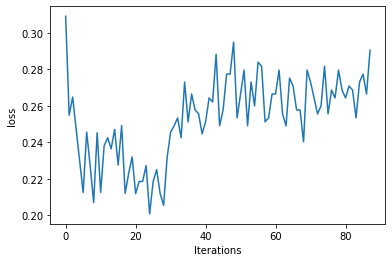

Average Train Loss: 0.25317419586358914
Accuracy: 0.0
F1 Score: 0.625


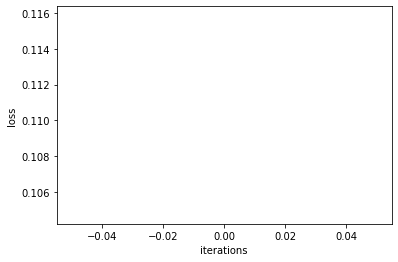

Test data Loss: 0.11029834082971017
Validation Loss: 0.10894947291248905


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
#VGG16 for classification of PneumoniaMNIST
model = classifier(2,1)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

train_test(model, optimizer, loss_fn, 4, pneu_train_loader, pneu_test_loader, pneu_val_loader)

In [ ]:
#VGG16 for classification of BloodMNIST
model = classifier(8,3)
optimizer = optim.Adam(model.parameters(), lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

train_test(model, optimizer, loss_fn, 1, blood_train_loader, blood_test_loader, blood_val_loader)


Epoch: 0



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Processed: 214       loss: 0.9726936004601021
Processed: 428       loss: 0.9552702741108979
Processed: 642       loss: 0.8967399748144884
Processed: 856       loss: 0.8745042569606686
Processed: 1070       loss: 0.8928425718742808
Processed: 1284       loss: 0.8535037437207065
Processed: 1498       loss: 0.8686565308500476
Processed: 1712       loss: 0.852087148933684
Processed: 1926       loss: 0.8419735302663971
Processed: 2140       loss: 0.8505479785925187
Processed: 2354       loss: 0.8152225473810256
Processed: 2568       loss: 0.8364101251834073
Processed: 2782       loss: 0.8179611923476163
Processed: 2996       loss: 0.824539299479363
Processed: 3210       loss: 0.8236643385393607
Processed: 3424       loss: 0.8152996067792965
Processed: 3638       loss: 0.8061856903439684
Processed: 3852       loss: 0.7996515487310553
Processed: 4066       loss: 0.8137408253178033
Processed: 4280       loss: 0.8264568892928


#AlexNet

In [ ]:
class AlexNet(nn.Module):
  def __init__(self, num_classes):
    super(AlexNet,self).__init__()

    self.alexnet = alexnet(pretrained=True)

    self.alexnet.classifier[-1] = nn.Linear(4096,num_classes)
    for param in self.alexnet.features.parameters():
      param.requires_grad = False

    #print(self.alexnet)

  def forward(self, x):
    x = self.alexnet.features(x)
    x = self.alexnet.avgpool(x)
    x = torch.flatten(x,1)
    x = self.alexnet.classifier(x)
    
    return F.softmax(x)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]


Epoch: 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Processed: 214       loss: 0.4443205051603708
Processed: 428       loss: 0.25338019203781526
Processed: 642       loss: 0.2642981771173743
Processed: 856       loss: 0.26866537062858786
Processed: 1070       loss: 0.2773997576510149
Processed: 1284       loss: 0.27958335440662174
Processed: 1498       loss: 0.26866537062858786
Processed: 1712       loss: 0.2752161608954082
Processed: 1926       loss: 0.26648177387298105
Processed: 2140       loss: 0.2642981771173743
Processed: 2354       loss: 0.2599309836061608
Processed: 2568       loss: 0.2621145803617675
Processed: 2782       loss: 0.29050133818465557
Processed: 2996       loss: 0.2599309836061608
Processed: 3210       loss: 0.24464580631691335
Processed: 3424       loss: 0.25774738685055393
Processed: 3638       loss: 0.27958335440662174
Processed: 3852       loss: 0.2555637900949472
Processed: 4066       loss: 0.25774738685055393
Processed: 4280       loss: 0.2817669511622285
Processed: 4494       loss: 0.2599309836061608
Process

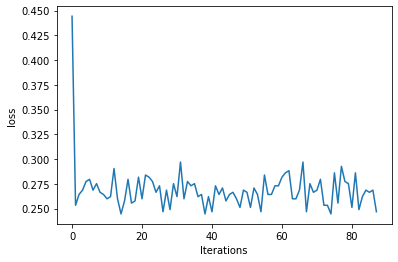

Average Train Loss: 0.2689741269223264
Accuracy: 0.0
F1 Score: 0.625


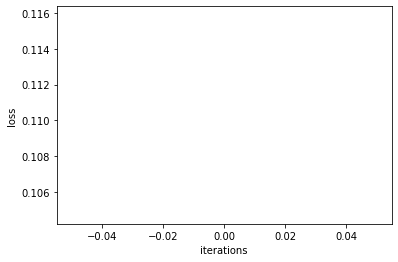

Test data Loss: 0.11029834082971017
Validation Loss: 0.10894947291248905


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
#Alexnet for classification of PneumoniaMNIST
model = AlexNet(2)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

train_test(model, optimizer, loss_fn, 4, pneu_train_loader, pneu_test_loader, pneu_val_loader)


Epoch: 0



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Processed: 214       loss: 0.9936446239879761
Processed: 428       loss: 0.8685187022023163
Processed: 642       loss: 0.9231098190812901
Processed: 856       loss: 0.8713997340179426
Processed: 1070       loss: 0.9142267546785774
Processed: 1284       loss: 0.9330472135889507
Processed: 1498       loss: 0.9333803722645813
Processed: 1712       loss: 0.8987515992978347
Processed: 1926       loss: 0.9273179374581207
Processed: 2140       loss: 0.9312462490170749
Processed: 2354       loss: 0.9139477545459758
Processed: 2568       loss: 0.9401714234843983
Processed: 2782       loss: 0.9380712736870112
Processed: 2996       loss: 0.9269292882586454
Processed: 3210       loss: 0.9140161168930343
Processed: 3424       loss: 0.9380461388940383
Processed: 3638       loss: 0.9096823932718674
Processed: 3852       loss: 0.9180212416017053
Processed: 4066       loss: 0.9337295261634283
Processed: 4280       loss: 0.9183215984601373
Processed: 4494       loss: 0.9272354447130491
Processed: 4708  

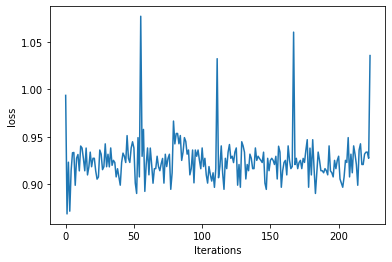

Average Train Loss: 0.9250470123175875
Accuracy: 0.0
F1 Score: 0.3004969307220111
AUC: 0.9008581108894588


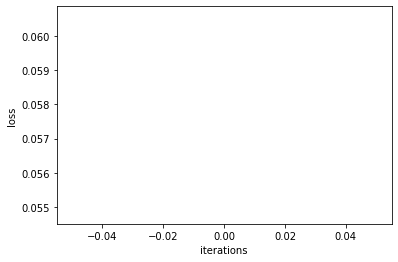

Test data Loss: 0.05768724001473607


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validation Loss: 0.11522235313516818


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
#Alexnet for classification of BloodMNIST
model = AlexNet(8)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

train_test(model, optimizer, loss_fn, 4, blood_train_loader, blood_test_loader, blood_val_loader)

In [ ]:
#data preprocessing of speech data

# Function for computing spectogram
def spectogram(audio,window_length,window_shift,data_length):
  spectogram_vec = []
  i = 0
  j = window_length
  s = window_shift
  while(j<=data_length):
    window_data = audio[i:j]
    window_data_fft = np.fft.fft(window_data,256)
    vector = np.log(abs(window_data_fft[0:128]))
    i = i+s
    j = j+s
    spectogram_vec.append(vector)
  return np.array(spectogram_vec)

In [ ]:
sampling_freq = 16000
frame_length = 0.025
frame_shift = 0.010
window_length = int(sampling_freq*frame_length)
window_shift = int(sampling_freq*frame_shift)

# SUPPORT VECTOR MACHINES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import load

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)




    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(train_X[:, 0], train_X[:, 1], marker="o", c=train_y)

        x0_1 = np.amin(train_X[:, 0])
        x0_2 = np.amax(train_X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(train_X[:, 1])
        x1_max = np.amax(train_X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])
        plt.title('Visualization of data separablity')

        plt.show()

    # visualize_svm()
    pass

 SVM without slack for binary classification on pneumonia dataset



In [ ]:

train_X=pneu_train_vdata
train_y=np.ravel(pneu_train_labels)
test_X=pneu_test_vdata
test_y=np.ravel(pneu_test_labels)
clf = SVM()
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
calc_classification_metrics(test_y,predictions)
total_correct = 0
for i in range(len(test_y)):
    if int(test_y[i]) == int(predictions[i]):
        total_correct += 1

acc = total_correct / len(test_y)
print('accuracy of SVM without slack for binary classification is:',acc)

Accuracy: 0.5576923076923077
F1 Score: 0.5576923076923077
AUC: 0.8692307692307691
accuracy of SVM without slack for binary classification is: 0.5576923076923077


svm without slack on blood mnist dataset

In [ ]:

train_X=blood_train_vdata
train_y=np.ravel(blood_train_labels)
test_X=blood_test_vdata
test_y=np.ravel(blood_test_labels)
clf = SVM()
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
calc_classification_metrics(test_y,predictions)
total_correct = 0
for i in range(len(test_y)):
    if int(test_y[i]) == int(predictions[i]):
        total_correct += 1

acc = total_correct / len(test_y)
print('accuracy of SVM without slack for multi classification is:',acc)


Accuracy: 0.1824028061970184
F1 Score: 0.1824028061970184
accuracy of SVM without slack for multi classification is: 0.1824028061970184


#SVM WITH SLACK FORMULATION"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from numpy import load
import pandas as pd




class LinearSVMUsingSoftMargin:
    def __init__(self, C=1.0):
        self._support_vectors = None
        self.C = C
        self.beta = None
        self.b = None
        self.X = None
        self.y = None

        # n is the number of data points
        self.n = 0

        # d is the number of dimensions
        self.d = 0

    def __decision_function(self, X):
        return X.dot(np.array(self.beta).T) + self.b

    def __cost(self, margin):
        return (1 / 2) * self.beta.dot(self.beta) + self.C * np.sum(np.maximum(0, 1 - margin))

    def __margin(self, X, y):
        return y * self.__decision_function(X)

    def fit(self, X, y, lr=1e-3, epochs=500):
        # Initialize Beta and b
        self.n, self.d = X.shape
        self.beta = np.random.randn(self.d)
        self.b = 0

        # Required only for plotting
        self.X = X
        self.y = y

        loss_array = []
        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__cost(margin)
            loss_array.append(loss)

            misclassified_pts_idx = np.where(margin < 1)[0]
            d_beta = self.beta - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
            self.beta = self.beta - lr * d_beta

            d_b = - self.C * np.sum(y[misclassified_pts_idx])
            self.b = self.b - lr * d_b

        self._support_vectors = np.where(self.__margin(X, y) <= 1)[0]

    def predict(self, X):
        return np.sign(self.__decision_function(X))

    def score(self, X, y):
        P = self.predict(X)
        return np.mean(y == P)

    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=.7)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.__decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['r', 'b', 'r'], levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])

        # highlight the support vectors
        ax.scatter(self.X[:, 0][self._support_vectors], self.X[:, 1][self._support_vectors], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')

        plt.show()

def get_metrics(y_true, y_prediction):
    cnf_matrix = confusion_mat(y_true, y_prediction)
    # print(cnf_matrix)
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    div = TP+FN
    TPR = [0 if d==0 else 1/d for d in div]
    TPR = TPR * TP

    div = TN+FP
    TNR = [0 if d==0 else 1/d for d in div]
    TNR = TNR * TN

    div = TP+FP
    PPV = [0 if d==0 else 1/d for d in div]
    PPV = PPV * TP

    ACC = (TP+TN)/(TP+FP+FN+TN)
    AUC = (TNR + TPR)/2
    div = TPR + PPV
    F1 = [0 if d==0 else 1/d for d in div]
    F1 *= 2*TPR*PPV

    return ACC, F1, AUC





    # model.plot_decision_boundary()

svm with slack on pneumonia dataset

In [ ]:
train_X=pneu_train_vdata
train_y=np.ravel(pneu_train_labels)
test_X=pneu_test_vdata
test_y=np.ravel(pneu_test_labels)
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
model = LinearSVMUsingSoftMargin(C=56.0)
model.fit(train_X, train_y)
print("SVM with slack")
print("train score:", model.score(train_X, train_y))
print("test score:", model.score(test_X, test_y))

SVM with slack
train score: 0.7421410365335599
test score: 0.21314102564102563


svm with slack on bloodmnist dataset


In [ ]:
train_X=pneu_train_vdata
train_y=np.ravel(pneu_train_labels)
test_X=pneu_test_vdata
test_y=np.ravel(pneu_test_labels)
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
model = LinearSVMUsingSoftMargin(C=56.0)
model.fit(train_X, train_y)
print("SVM with slack for multi classification")
print("train score:", model.score(train_X, train_y))
print("test score:", model.score(test_X, test_y))

SVM with slack for multi classification
train score: 0.7421410365335599
test score: 0.2387820512820513
